In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from googlefinance import getQuotes
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('daily.csv')
df

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200713,56,3350434,37653841,2610.0,53921.0,264865.0,6061.0,11749.0,2259.0,...,2020-07-13T00:00:00Z,41006885,41004275,41004275,327,1214,663634,58465,722099,b8a05ff4777f828893dd206d2505de6efe69835f
1,20200712,56,3291969,36990207,2639.0,52578.0,263651.0,5919.0,11679.0,2182.0,...,2020-07-12T00:00:00Z,40284815,40282176,40282176,476,939,666340,60978,727318,b54a9db52f34cf994d9feb257d49daf9faed3e37
2,20200711,56,3230991,36323867,2618.0,51798.0,262712.0,5928.0,11612.0,2169.0,...,2020-07-11T00:00:00Z,39557476,39554858,39554858,757,5141,572430,63007,635437,c8509fb6eafbe5bc7aa33e4cdd7b0c9488029d08
3,20200710,56,3167984,35751437,2493.0,51544.0,257571.0,5889.0,11523.0,2197.0,...,2020-07-10T00:00:00Z,38921914,38919421,38919421,854,2318,756730,66645,823375,f32acc8a0a75e68d628c9ba1fe481bac263d093e
4,20200709,56,3101339,34994707,2530.0,43895.0,255253.0,5839.0,11370.0,2127.0,...,2020-07-09T00:00:00Z,38098576,38096046,38096046,867,1719,641544,58836,700380,eb15b7f35fbcfe2d92a86f0a4cc15dfa21528cf2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,20200126,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-26T00:00:00Z,2,2,2,0,0,0,0,0,e1cf59ab48e1cf367c4a6798a508a23d9d36bd18
170,20200125,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-25T00:00:00Z,2,2,2,0,0,0,0,0,bef2a1d5f2a13491e0e0369bbd46c10cdd12973b
171,20200124,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-24T00:00:00Z,2,2,2,0,0,0,0,0,bfffe76fc0b7cf11efe8aecd3cc7b22598d77d61
172,20200123,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-23T00:00:00Z,2,2,2,0,0,0,0,0,cee36ebf3174bf1df0daa36e1e8088a157406fad


In [3]:
df1 = df[['lastModified', 'positiveIncrease']]
df1.describe

<bound method NDFrame.describe of              lastModified  positiveIncrease
0    2020-07-13T00:00:00Z             58465
1    2020-07-12T00:00:00Z             60978
2    2020-07-11T00:00:00Z             63007
3    2020-07-10T00:00:00Z             66645
4    2020-07-09T00:00:00Z             58836
..                    ...               ...
169  2020-01-26T00:00:00Z                 0
170  2020-01-25T00:00:00Z                 0
171  2020-01-24T00:00:00Z                 0
172  2020-01-23T00:00:00Z                 0
173  2020-01-22T00:00:00Z                 0

[174 rows x 2 columns]>

In [4]:
start_date = '2020-03-01'
end_date = '2020-05-13'
panel_data = data.DataReader('^GSPC', 'yahoo', start_date, end_date)
close = panel_data['Close']
panel_data.to_csv('all_data.csv')
close.to_csv('close_data.csv')

C:\Users\Mangekyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [5]:
df2 = pd.read_csv('close_data.csv', names=['Date','Price'])
StockDate = df2.iloc[:,:-1]
df2

,Date,Price
0,2020-03-02,3090.229980
1,2020-03-03,3003.370117
2,2020-03-04,3130.120117
3,2020-03-05,3023.939941
4,2020-03-06,2972.370117
5,2020-03-09,2746.560059
6,2020-03-10,2882.229980
7,2020-03-11,2741.379883
8,2020-03-12,2480.639893
9,2020-03-13,2711.020020


In [6]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
all_weekdays

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13'],
              dtype='datetime64[ns]', freq='B')

In [7]:
#close = close.reindex(all_weekdays)

In [8]:
#close.describe

In [9]:
date = df1['lastModified']
date

0      2020-07-13T00:00:00Z
1      2020-07-12T00:00:00Z
2      2020-07-11T00:00:00Z
3      2020-07-10T00:00:00Z
4      2020-07-09T00:00:00Z
               ...         
169    2020-01-26T00:00:00Z
170    2020-01-25T00:00:00Z
171    2020-01-24T00:00:00Z
172    2020-01-23T00:00:00Z
173    2020-01-22T00:00:00Z
Name: lastModified, Length: 174, dtype: object

In [10]:
date = pd.to_datetime(date)

In [11]:
df1['lastModified'] = date.dt.strftime('%Y-%m-%d')

C:\Users\Mangekyo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1

,lastModified,positiveIncrease
0,2020-07-13,58465
1,2020-07-12,60978
2,2020-07-11,63007
3,2020-07-10,66645
4,2020-07-09,58836
...,...,...
169,2020-01-26,0
170,2020-01-25,0
171,2020-01-24,0
172,2020-01-23,0


In [13]:
df2

,Date,Price
0,2020-03-02,3090.229980
1,2020-03-03,3003.370117
2,2020-03-04,3130.120117
3,2020-03-05,3023.939941
4,2020-03-06,2972.370117
5,2020-03-09,2746.560059
6,2020-03-10,2882.229980
7,2020-03-11,2741.379883
8,2020-03-12,2480.639893
9,2020-03-13,2711.020020


In [14]:
resultSet = pd.merge(df1, df2, left_on = 'lastModified', right_on= 'Date', how = 'right').drop('lastModified', axis = 1)
resultSet

,positiveIncrease,Date,Price
0,21193,2020-05-13,2820.000000
1,22663,2020-05-12,2870.120117
2,18236,2020-05-11,2930.189941
3,27605,2020-05-08,2929.800049
4,27490,2020-05-07,2881.189941
5,25056,2020-05-06,2848.419922
6,22449,2020-05-05,2868.439941
7,22523,2020-05-04,2842.739990
8,33056,2020-05-01,2830.709961
9,29619,2020-04-30,2912.429932


In [15]:
# X = resultSet['positiveIncrease'].values
# y = resultSet['Price'].values
X = resultSet.iloc[:, :-2].values
y = resultSet.iloc[:, -1].values

In [16]:
X

array([[21193],
       [22663],
       [18236],
       [27605],
       [27490],
       [25056],
       [22449],
       [22523],
       [33056],
       [29619],
       [27231],
       [25204],
       [21979],
       [34174],
       [31788],
       [28912],
       [26333],
       [25872],
       [31964],
       [30923],
       [30298],
       [25631],
       [25133],
       [34419],
       [30534],
       [30737],
       [28937],
       [31945],
       [27992],
       [25773],
       [24694],
       [21897],
       [19044],
       [17656],
       [12873],
       [10632],
       [11442],
       [ 6255],
       [ 4671],
       [ 3171],
       [ 3613],
       [ 1569],
       [ 1025],
       [  682],
       [  527],
       [  441],
       [  367],
       [  141],
       [  153],
       [  187],
       [  100],
       [   82]], dtype=int64)

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

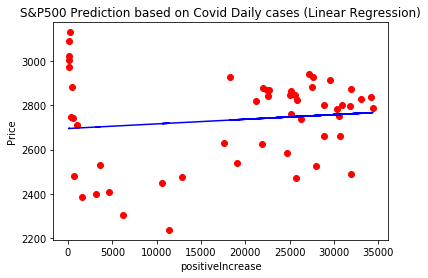

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('S&P500 Prediction based on Covid Daily cases (Linear Regression)')
plt.xlabel('positiveIncrease')
plt.ylabel('Price')
plt.show()

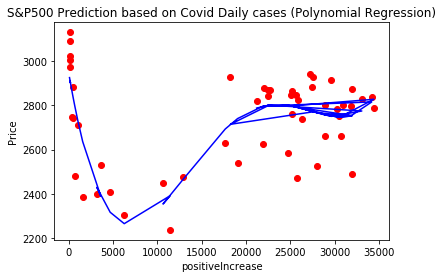

In [20]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('S&P500 Prediction based on Covid Daily cases (Polynomial Regression)')
plt.xlabel('positiveIncrease')
plt.ylabel('Price')
plt.show()

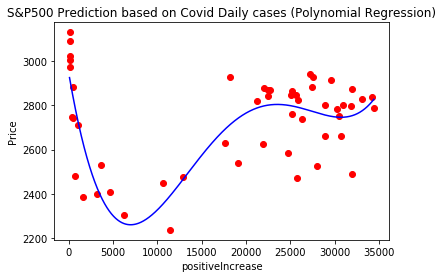

In [21]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('S&P500 Prediction based on Covid Daily cases (Polynomial Regression)')
plt.xlabel('positiveIncrease')
plt.ylabel('Price')
plt.show()